In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import nltk
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer,ToktokTokenizer
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,recall_score,precision_score
from sklearn.naive_bayes import MultinomialNB
from string import punctuation
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet,stopwords
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP_Demo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
%matplotlib inline

In [2]:
df= pd.read_excel("Training Data.xlsx")


In [3]:
df.tail()


,sentiment,text
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."
14639,neutral,@AmericanAir we have 8 ppl so we need 2 know h...


In [4]:
df.dtypes

sentiment    object
text         object
dtype: object

In [5]:
df["sentiment"].value_counts()

negative    9178
neutral     3099
positive    2363
Name: sentiment, dtype: int64

In [6]:
count1 = Counter(" ".join(df[df['sentiment']== 'positive']['text']).split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)


In [7]:
df1 = df1.rename(columns={0: "common_words", 1 : "count"})
df1.head()

,common_words,count
0,the,924
1,to,923
2,for,658
3,I,574
4,@SouthwestAir,548


In [8]:
count2 = Counter(" ".join(df[df['sentiment']== 'negative']['text']).split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "common_words", 1 : "count"})
df2.head()

,common_words,count
0,to,5966
1,the,3929
2,I,3375
3,a,3087
4,and,2685


In [9]:
count3 = Counter(" ".join(df[df['sentiment']== 'neutral']['text']).split()).most_common(20)
df3 = pd.DataFrame.from_dict(count3)
df3 = df3.rename(columns={0: "common_words", 1 : "count"})
df3.head()

,common_words,count
0,to,1646
1,I,1105
2,the,928
3,a,771
4,@united,657


In [10]:
#Tolowercase
def lower_case(text):
    return ' '.join([w.lower() for w in word_tokenize(text)])


In [11]:
df["text"]= df["text"].apply(lower_case)

In [12]:
#Function for removing special characters and punctuation
def remove_special_char(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
def remove_punctuation(review):
    return ''.join(t for t in review if t not in punctuation)

df["text"] = df["text"].apply(remove_special_char)
df["text"] = df["text"].apply(remove_punctuation)

In [13]:
df.iloc[1,1]

' virginamerica plus you ve added commercials to the experience  tacky '

In [14]:
#Replacing elongated words like sooooooo
def replaceElongated(word):
    repeat_regexp = re.compile(r'(\w*)(\w)\2(\w*)')
    repl = r'\1\2\3'
    if wordnet.synsets(word):
        return word
    repl_word = repeat_regexp.sub(repl, word)
    if repl_word != word:      
        return replaceElongated(repl_word)
    else:       
        return repl_word
df["text"] = df["text"].apply(replaceElongated)

In [15]:
#Splitting sentences into terms or words using tokenization
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')

df["text"] = df["text"] .apply(lambda x: tokenizer.tokenize(x))

In [16]:
#Removing stopwords
stopword_list=stopwords.words('english')
def remove_stopwords(text):
    words = [w for w in text if w not in stopword_list]
    return words

df["text"] = df["text"].apply(lambda x : remove_stopwords(x))


In [17]:
df.iloc[1,1]

['virginamerica', 'plus', 'aded', 'comercials', 'experience', 'tacky']

In [18]:
#Removing numbers
def rem_numbers(word_list):
    new_word_list = []
    for i in word_list:
        if not re.search('\d', i):
             new_word_list.append(i)
    return ' '.join(new_word_list)
df["text"] = df["text"].apply(rem_numbers)

In [19]:
df.head()

,sentiment,text
0,neutral,virginamerica dhepburn said
1,positive,virginamerica plus aded comercials experience ...
2,neutral,virginamerica nt today must mean ned take anot...
3,negative,virginamerica realy agresive blast obnoxious e...
4,negative,virginamerica realy big bad thing


In [20]:
from imblearn.over_sampling import SMOTE


In [21]:
cv=CountVectorizer()
sm = SMOTE()

train_data,test_data = train_test_split(df,train_size=0.8,random_state=0)

X_train = cv.fit_transform(train_data['text'])
y_train = train_data['sentiment']
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

X_test = cv.transform(test_data['text'])
y_test = test_data['sentiment']
print(X_test)

  (0, 185)	1
  (0, 344)	1
  (0, 1318)	1
  (0, 1401)	1
  (0, 2546)	1
  (0, 3967)	1
  (0, 4535)	1
  (0, 6407)	1
  (0, 6535)	1
  (0, 7380)	1
  (0, 7506)	1
  (0, 7972)	1
  (0, 8509)	1
  (1, 63)	1
  (1, 250)	1
  (1, 344)	1
  (1, 1939)	1
  (1, 2565)	1
  (1, 4080)	1
  (1, 4542)	1
  (1, 5209)	1
  (1, 7006)	1
  (1, 10687)	1
  (2, 838)	1
  (2, 891)	1
  :	:
  (2926, 1439)	1
  (2926, 2165)	1
  (2926, 3536)	2
  (2926, 3865)	1
  (2926, 5240)	1
  (2926, 5666)	1
  (2926, 6790)	1
  (2926, 7010)	1
  (2926, 9422)	1
  (2926, 10158)	1
  (2926, 10357)	1
  (2927, 322)	1
  (2927, 462)	1
  (2927, 2415)	1
  (2927, 2856)	1
  (2927, 4186)	1
  (2927, 4467)	1
  (2927, 4646)	1
  (2927, 5364)	1
  (2927, 6216)	1
  (2927, 8860)	1
  (2927, 9796)	1
  (2927, 10045)	1
  (2927, 10571)	1
  (2927, 10707)	1


In [22]:
unique, counts = np.unique(y_train_res, return_counts=True)
print(list(zip(unique, counts)))

[('negative', 7308), ('neutral', 7308), ('positive', 7308)]


In [23]:
model = MultinomialNB()
model.fit(X_train_res, y_train_res)

MultinomialNB()

In [24]:
predictions=model.predict(X_test)
print(predictions)

['negative' 'negative' 'negative' ... 'negative' 'negative' 'negative']


In [25]:
accuracy = accuracy_score(y_test,predictions)
print('Accuracy:',accuracy)

Accuracy: 0.7814207650273224


In [95]:
p = pd.read_excel('Amazon.xlsx')

In [96]:

p.tail()

,product,text,review_header
1237,https://www.walmart.com/reviews/product/122655089,Great item for the price. Good base decent bat...,NaN
1238,https://www.walmart.com/reviews/product/122655089,Great item for the price. Good base decent bat...,NaN
1239,https://www.walmart.com/reviews/product/122655089,"The only thing I did not like is, it only come...",NaN
1240,https://www.walmart.com/reviews/product/122655089,"Good clarity. Small, compact and easily insert...",NaN
1241,https://www.walmart.com/reviews/product/122655089,"Loving it, very little work to set up and get ...",NaN


In [97]:
p["text"]= p["text"].apply(lower_case)

In [98]:
p["text"] = p["text"].apply(replaceElongated)

In [99]:
p["text"] = p["text"] .apply(lambda x: tokenizer.tokenize(x))

In [100]:
p["text"] = p["text"].apply(lambda x : remove_stopwords(x))

In [101]:
p["text"] = p["text"].apply(rem_numbers)

In [102]:
X_test_new = cv.transform(p["text"])

In [103]:
predictions=model.predict(X_test_new)
print(predictions)

['negative' 'positive' 'negative' ... 'negative' 'positive' 'positive']


In [104]:
new_series = pd.Series(predictions)
print("Converted Pandas series:")
print(new_series)

Converted Pandas series:
0       negative
1       positive
2       negative
3       negative
4       negative
          ...   
1237    positive
1238    positive
1239    negative
1240    positive
1241    positive
Length: 1242, dtype: object


In [105]:
data = new_series.value_counts()
print(data)

negative    877
positive    303
neutral      62
dtype: int64


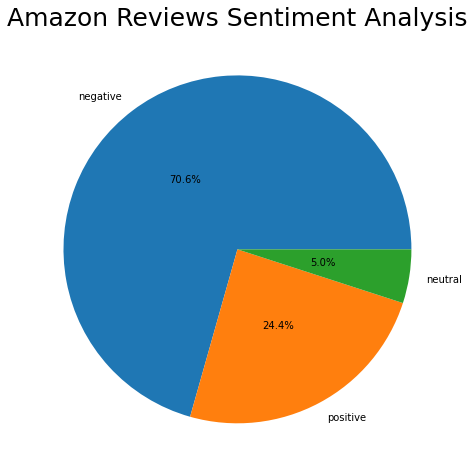

In [106]:
#Using matplotlib
pie, ax = plt.subplots(figsize=[12,8])
labels = data.keys()
plt.pie(x=data, autopct="%.1f%%", labels=labels, pctdistance=0.5)
plt.title("Amazon Reviews Sentiment Analysis", fontsize=25);
pie.savefig("Amazon Reviews.png",  dpi=800)